## Imports

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

## Extraction

([<matplotlib.axis.YTick at 0x1ddff5720b0>,
 [Text(0, 405, '405'), Text(0, 495, '495')])

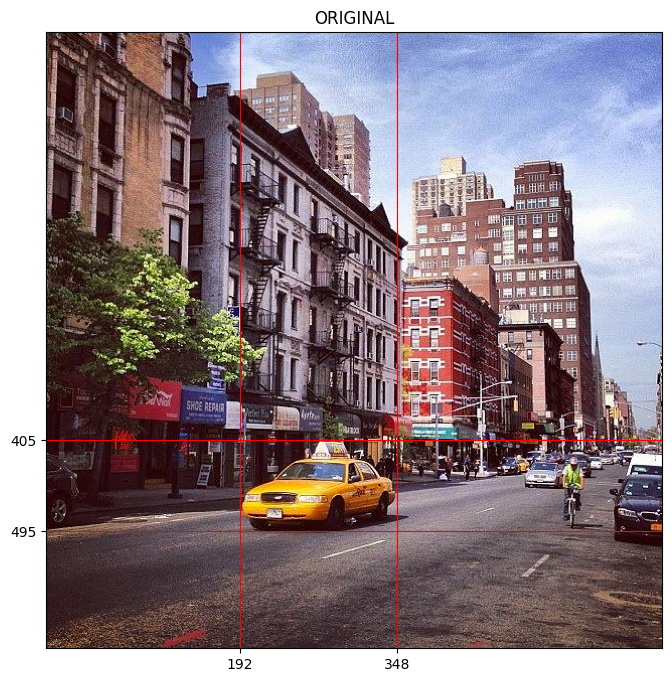

In [3]:
img = cv.imread(cv.samples.findFile("./test.jpg"))

plt.figure(figsize=(8,8))
plt.grid(True, color="r")
plt.imshow(img[:,:,::-1])
plt.title("ORIGINAL")
plt.xticks([192,348])
plt.yticks([405,495])

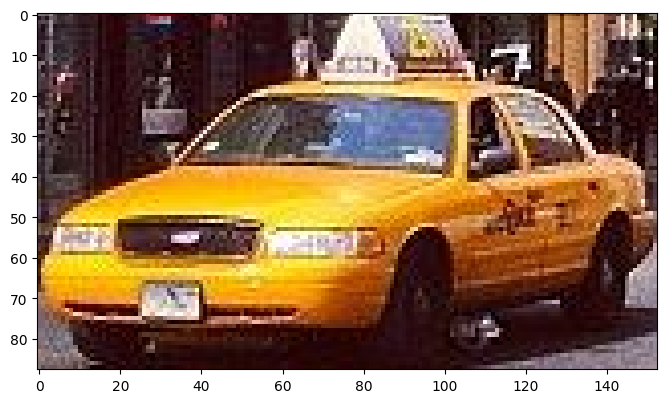

In [4]:
taxi = img[407:495, 194:347]

plt.figure(figsize=(8,8))
plt.imshow(taxi[:,:,::-1]);

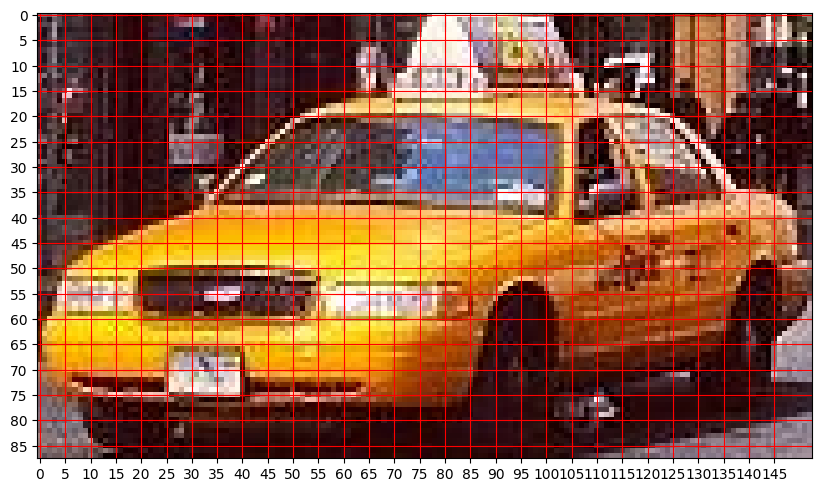

In [5]:
plt.figure(figsize=(10,10))
plt.grid(True, color="r")
plt.yticks([i for i in range(0, 90, 5)])
plt.xticks([i for i in range(0, 150, 5)])
plt.imshow(taxi[:,:,::-1])

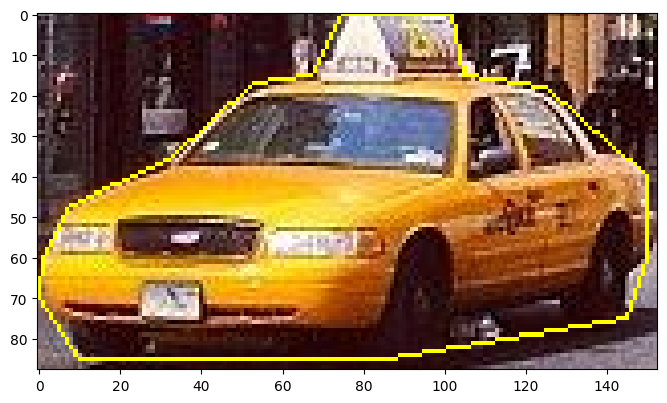

In [6]:
# Making a polygon of the car to avoid detecting stuff in the backgrund
copy = taxi.copy()
pts = np.array([[1,60], [8,47], [32,36], [53,17], [67,15], [75,0], [102,0], [105,15], [125,18], [150,40], [150,60], [145,75], [85,85], [10,85], [0,70]], np.int32)
pts = pts.reshape((-1,1,2))
cv.polylines(copy, [pts], True, (0,255,255), 1)

plt.figure(figsize=(8,8))
plt.imshow(copy[:,:,::-1]);

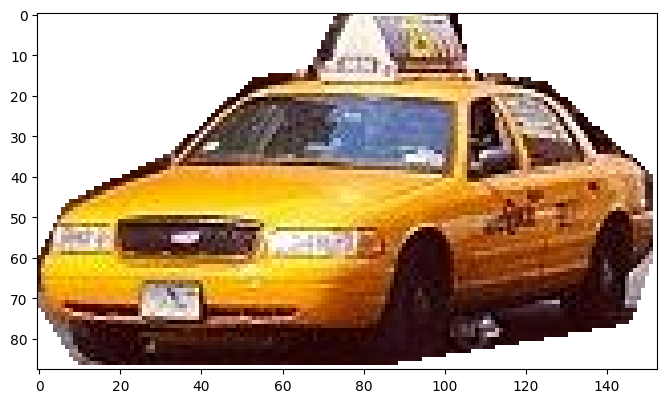

In [7]:
## (1) make mask
pts = pts - pts.min(axis=0)

mask = np.zeros(taxi.shape[:2], np.uint8)
cv.drawContours(mask, [pts], -1, (255, 255, 255), -1, cv.LINE_AA) #fill 

## (2) do bit-op
dst = cv.bitwise_and(taxi, taxi, mask=mask)

## (3) add the white background
bg = np.ones_like(taxi, np.uint8)*255
cv.bitwise_not(bg, bg, mask=mask)
dst2 = bg + dst

plt.figure(figsize=(8,8))
plt.imshow(dst2[:,:,::-1])

In [8]:
taxi_rgb = cv.cvtColor(dst2, cv.COLOR_BGR2RGB)
cv.imwrite("template.png", taxi_rgb)

True

## SIFT

In [13]:
template_gray = cv.imread("template.png", cv.IMREAD_GRAYSCALE)
test_gray = cv.imread("test.jpg", cv.IMREAD_GRAYSCALE) 

In [14]:
sift = cv.SIFT_create()

kp_template, des_template = sift.detectAndCompute(template_gray,None)
kp_test, des_test = sift.detectAndCompute(test_gray,None)

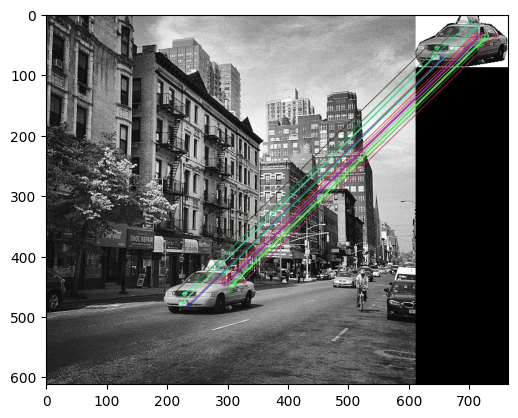

(<matplotlib.image.AxesImage at 0x1dd9a5b0ca0>, None)

In [23]:
bf = cv.BFMatcher()

matches_knn = bf.knnMatch(des_test,des_template,k=2)

good_matches_knn = []

for m,n in matches_knn:
    if m.distance < 0.5*n.distance:
        good_matches_knn.append([m])

img_match_knn = cv.drawMatchesKnn(test_gray,kp_test,template_gray,kp_template,good_matches_knn,None,
                                  flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(img_match_knn),plt.show()

## SURF